<a href="https://colab.research.google.com/github/SophistryDude/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/Nick_M's_Copy_of_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)


In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
from sklearn.linear_model import LinearRegression
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

Let's look at bedrooms as a feature

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, '# of bedrooms')

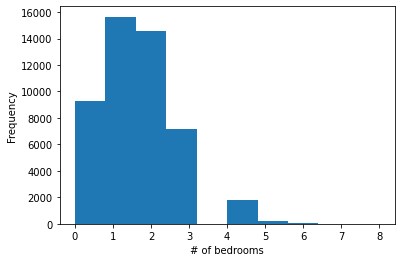

In [ ]:
# Here we are following along with Nick, creating a histogram of our data of choice. This shows that 1 br apartments are the most common, followed closely by 2 br apartments. I would assume that if we remove the apartments that 
# cost more than $4000 that we would have some better results later on.
import matplotlib.pyplot as plt

df['bedrooms'].plot(kind='hist')
plt.xlabel('# of bedrooms')

Text(0.5, 0, 'price')

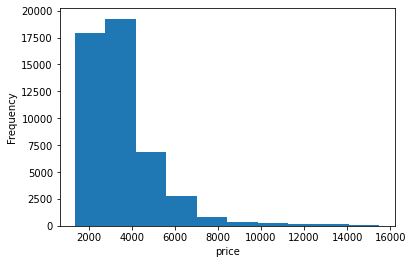

In [ ]:
#Here is where we see that the majority of units cost between 2k and 4k, this gives me the idea to separate the data based on this price point. 

df['price'].plot(kind='hist')
plt.xlabel('price')

Text(0, 0.5, 'price')

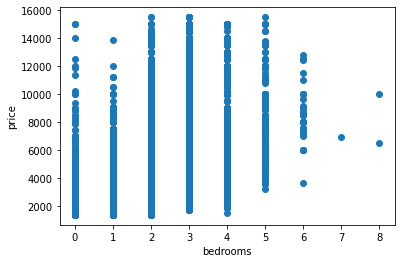

In [ ]:
# here's the virtually useless scatter plot for bedrooms. There will be a line of regression here, but the most important thing this graphical representation shows us is that studios and 1 br's fall off at a lower price point, and that 5+ br start off at significantly higher price points. 
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

In [ ]:
# This handy line of code let's us use price as our F(x) function. We could also do x = df['price'].
target = 'price'
y = df[target]
x = df[['bedrooms']]

In [ ]:
# Here we are taking a measure of errors between the price observations.
from sklearn.metrics import mean_absolute_error
y_pred = [y.mean()]* len(y)
print('Baseline MAE:', mean_absolute_error(y, y_pred))

Baseline MAE: 1201.5251847945751


In [ ]:
# here we are using our y to evaluate x, then using that evaluation to create a prediction, then running the MAE against that prediction, this should show us how much our x value (bathrooms in this case) affect the price.
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [ ]:
print('train MAE', mean_absolute_error(y, y_pred))

train MAE 975.6559731054491


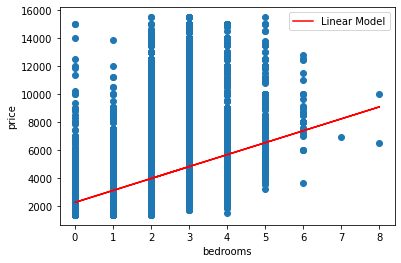

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.legend()

In [ ]:
# The starting price of $2268 seems to be affected a lot by the higher quality condos in the area. If we were to isolate the <$4000 apartments I would expect this number to change quite a bit. Probably something like $1200~ + $600~. 
print(f'price = {model.intercept_} + {model.coef_[0]} x bedrooms')

price = 2267.9741491780505 + 853.2541675274308 x bedrooms


Baseline MAE: 489.7892310747686
train MAE 489.7892310747686


Text(0, 0.5, 'price')

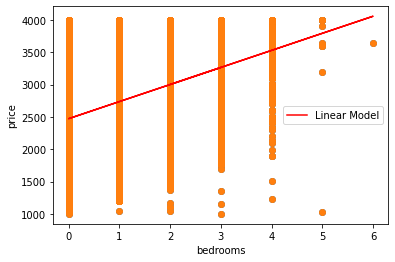

In [ ]:
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
df = df[(df['price'] >= 1000) & (df['price'] <= 4000) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]
target = 'price'
y = df[target]
x = df[['bedrooms']]

y_pred = [y.mean()]* len(y)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.legend()

print('Baseline MAE:', mean_absolute_error(y, y_pred))
print('train MAE', mean_absolute_error(y, y_pred))
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

In [ ]:
# Interesting. I was quite off on my prediction. I expected the price of a studio to be approximately $1200+, with the bedrooms being approximately $600 each, but instead the base unit price of units under $4000 is nearly $2500! 
#with each bedroom only costing an additional $264. Maybe tomorrow we will add a third feature in the analysis and we can combine SQ FT. 

print(f'price = {model.intercept_} + {model.coef_[0]} x bedrooms')

price = 2473.634772594824 + 263.9983048614166 x bedrooms


In [ ]:

xfit = np.linspace(0,6)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# Coordinates

Text(0, 0.5, 'price')

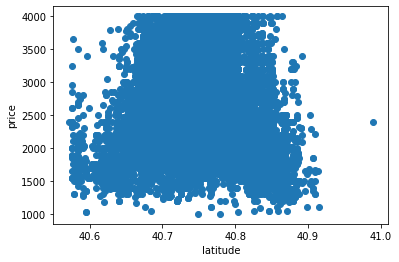

In [ ]:
# let's plot latitude as a function of price
plt.scatter(df['latitude'], df['price'])
plt.xlabel('latitude')
plt.ylabel('price')

There seems to be a lot of clumping between 40.7 and 40.82~.

In [ ]:
target = 'price'
y = df[target]
x = df[['latitude']]

In [ ]:
y_pred = [y.mean()]* len(y)
print('Baseline MAE:', mean_absolute_error(y, y_pred))

Baseline MAE: 543.1605676667776


In [ ]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
print('train MAE', mean_absolute_error(y, y_pred))

train MAE 539.3285623960928


Exciting! the Baseline MAE and the predictive MAE are virtually the same. This tells me that x probably has very little impact on y.

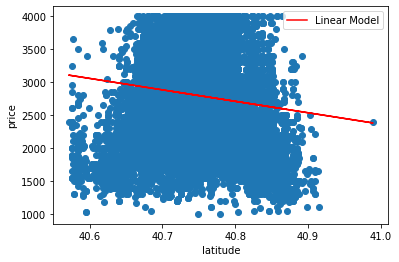

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('latitude')
plt.ylabel('price')
plt.legend()

Oddly enough, the line of regression seems to slope down, even though there is an obvious cluster of expensive houses between 40.7 and 40.8 latitude. This tells me that we may be able to isolate this subset of data and gain further analysis. 

In [ ]:
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.7) & (df['latitude'] < 40.82) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]
target = 'price'
y = df[target]
x = df[['latitude']]

from sklearn.metrics import mean_absolute_error
y_pred = [y.mean()]* len(y)
print('Baseline MAE:', mean_absolute_error(y, y_pred))


Baseline MAE: 514.4498292353559


In [ ]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
print('train MAE', mean_absolute_error(y, y_pred))

train MAE 505.0106212199366


Here the MAEs diverge a bit, but still very close. The divergence might mean that house pricing outside of the selected zone is more homogenous. I would expect the house pricing to be more homogenous the smaller a town gets. 

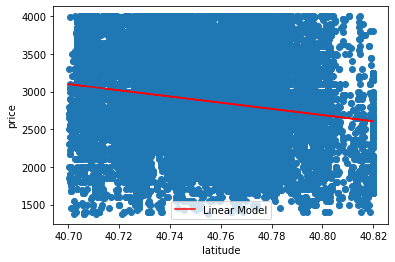

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('latitude')
plt.ylabel('price')
plt.legend()

Even with isolating on the 40.7-40.8 parallel the line of regression is still negative. I think that we can conclude that lattitude isn't affecting very much. This might mean that the longitude is the important factor here.

In [ ]:
# we can see with a df.info that isolating down to just between the 40.7 and 40.82 latitude only removed about 5000 apartments. or approximately 10% of listings. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30951 entries, 0 to 49350
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             30951 non-null  float64
 1   bedrooms              30951 non-null  int64  
 2   created               30951 non-null  object 
 3   description           30091 non-null  object 
 4   display_address       30856 non-null  object 
 5   latitude              30951 non-null  float64
 6   longitude             30951 non-null  float64
 7   price                 30951 non-null  int64  
 8   street_address        30945 non-null  object 
 9   interest_level        30951 non-null  object 
 10  elevator              30951 non-null  int64  
 11  cats_allowed          30951 non-null  int64  
 12  hardwood_floors       30951 non-null  int64  
 13  dogs_allowed          30951 non-null  int64  
 14  doorman               30951 non-null  int64  
 15  dishwasher         

Baseline MAE: 477.42002342039183
train MAE 477.42002342039183


Text(0, 0.5, 'price')

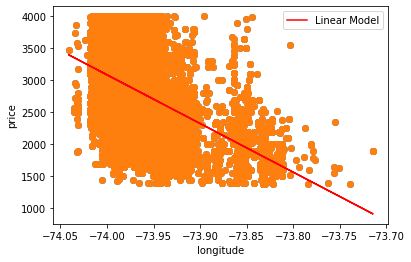

In [ ]:
# let's now analyze longitude as a function of price. 
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]
target = 'price'
y = df[target]
x = df[['longitude']]

y_pred = [y.mean()]* len(y)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('longitude')
plt.ylabel('price')
plt.legend()

print('Baseline MAE:', mean_absolute_error(y, y_pred))
print('train MAE', mean_absolute_error(y, y_pred))
plt.scatter(df['longitude'], df['price'])
plt.xlabel('longitude')
plt.ylabel('price')

This line of regression has an even greater slope than the latitude one. Let's isolate for the high pop density and see what's happening. 

In [ ]:
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -75.3) & (df['longitude'] <= -73.93)]
target = 'price'
y = df[target]
x = df[['longitude']]
y_pred = [y.mean()]* len(y)
model = LinearRegression()
print('train MAE', mean_absolute_error(y, y_pred))

train MAE 501.21045908399077


Baseline MAE: 479.7440748553572


Text(0, 0.5, 'price')

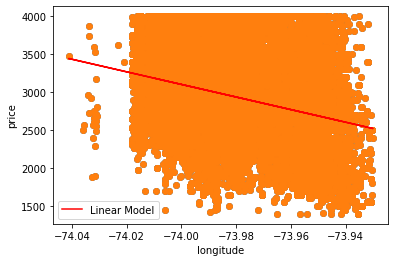

In [ ]:
model.fit(x,y)
y_pred = model.predict(x)
print('Baseline MAE:', mean_absolute_error(y, y_pred))


plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('longitude')
plt.ylabel('price')
plt.legend()

plt.scatter(df['longitude'], df['price'])
plt.xlabel('longitude')
plt.ylabel('price')

The Baseline MAE is almost the same as the previous MAE, but the predictive MAE is 6~% higher. Regardless, it seems that Longitude doesn't really play an affect either. Let's see what's really happening here. 

Baseline MAE: 0.015756267583558175


Text(0, 0.5, 'latitude')

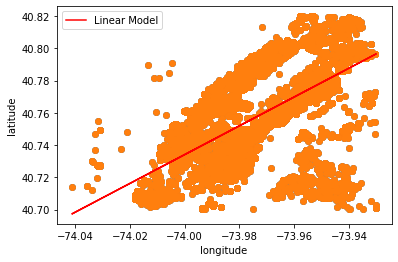

In [ ]:
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.7) & (df['latitude'] < 40.82) &
        (df['longitude'] >= -75.3) & (df['longitude'] <= -73.93)]
target = 'latitude'
y = df[target]
x = df[['longitude']]

model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r', label='Linear Model')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()

print('Baseline MAE:', mean_absolute_error(y, y_pred))
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')




And here we start to get a picture of NYC population centers. It would seem that the habitable areas of the city are so densely populated, that any change in latitude or longitude in nyc isn't severely affecting price. 


<center><img src="https://cdn11.bigcommerce.com/s-yqkp4d/images/stencil/2048x2048/products/5210/7339/0214108449_1__78509.1452186119.jpg?c=2" width=500></center>


# Extra Features

In [ ]:
# Unfortunately the NYC crime data needs to be cleaned up or converted and I didn't have enough time to go through the excel sheet. 
crime = pd.read_csv('https://github.com/SophistryDude/DS-Unit-2-Linear-Models/blob/master/data/NYC_crime.csv', sep='/', error_bad_lines=False)
print(crime.shape)
crime.info()

(291, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   <!DOCTYPE html>  291 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


b'Skipping line 10: expected 1 fields, saw 3\nSkipping line 11: expected 1 fields, saw 3\nSkipping line 12: expected 1 fields, saw 3\nSkipping line 13: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 3\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 9\nSkipping line 17: expected 1 fields, saw 6\nSkipping line 18: expected 1 fields, saw 6\nSkipping line 27: expected 1 fields, saw 4\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 29: expected 1 fields, saw 3\nSkipping line 30: expected 1 fields, saw 4\nSkipping line 34: expected 1 fields, saw 12\nSkipping line 35: expected 1 fields, saw 17\nSkipping line 41: expected 1 fields, saw 9\nSkipping line 46: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 9\nSkipping line 59: expected 1 fields, saw 6\nSkipping line 90: expected 1 fields, saw 8\nSkipping line 92: expected 1 fields, saw 7\nSkipping line 94: expected 1 fields, saw 15\nSkipping line 97: expected 

# Define a function to make new predictions and explain the model coefficient.

A function is classically defined as any operator where 1 input gives you 1 output. In this instance, a function is where you do some form of analysis in relation to another dataset. So for the above, I analyzed the amount of bedrooms in relation to price. I then analyzed the latitude in relation to price, realized that there was another influence, and then analyzed the longitude in relation to latitude and got an approximate population map of NY. 